<a href="https://colab.research.google.com/github/KunalDorik/Tamizan-Skills-Internship-ML-AI-PROJECT-2/blob/main/Project_2_Handwritten_Digit_Recognition_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 110ms/step - accuracy: 0.8152 - loss: 0.5814 - val_accuracy: 0.9805 - val_loss: 0.0659
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 107ms/step - accuracy: 0.9790 - loss: 0.0694 - val_accuracy: 0.9878 - val_loss: 0.0448
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 109ms/step - accuracy: 0.9861 - loss: 0.0445 - val_accuracy: 0.9897 - val_loss: 0.0392
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 105ms/step - accuracy: 0.9889 - loss: 0.0366 - val_accuracy: 0.9897 - val_loss: 0.0354
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.9915 - loss: 0.0276 - val_accuracy: 0.9895 - val_loss: 0.0359
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9929 - loss: 0.0224 - val_accuracy: 0.9925 - val_loss: 0.0330
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 110ms/step - accuracy: 0.9941 - loss: 0.0188 - val_accuracy: 0.9900 - val_loss: 0.0389
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 106ms/step - accuracy: 0.9953 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9888 - loss: 0.0368
Test accuracy: 0.9913


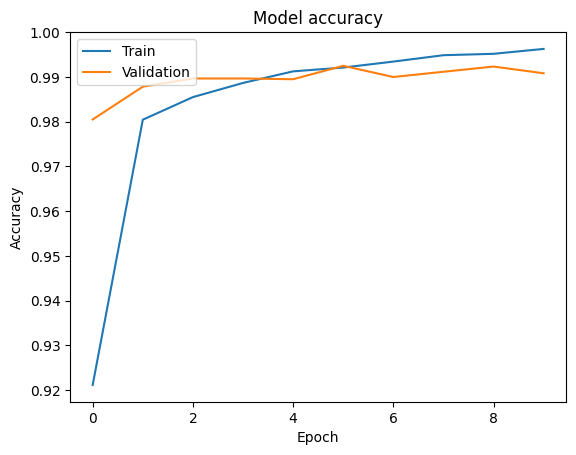

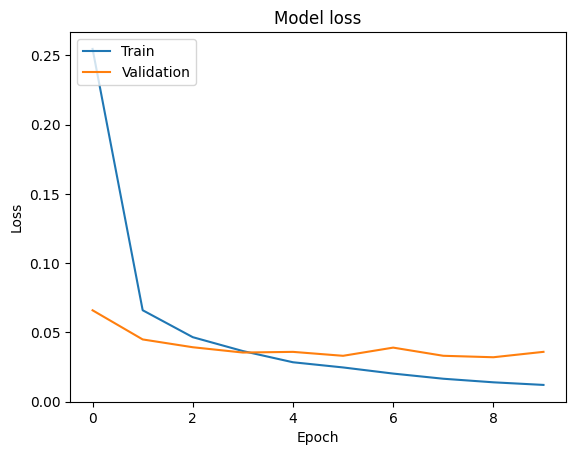

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()